In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
coffee = pd.read_csv('./starbucks_customers.csv', delimiter= ";")
coffee.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


In [3]:
ages = coffee["age"]

min_age = min(ages)
print(min_age)

max_age = max(ages)
print(max_age)

print(max_age - min_age)

mean_age = np.mean(ages)
print(mean_age)

13
70
57
27.33606557377049


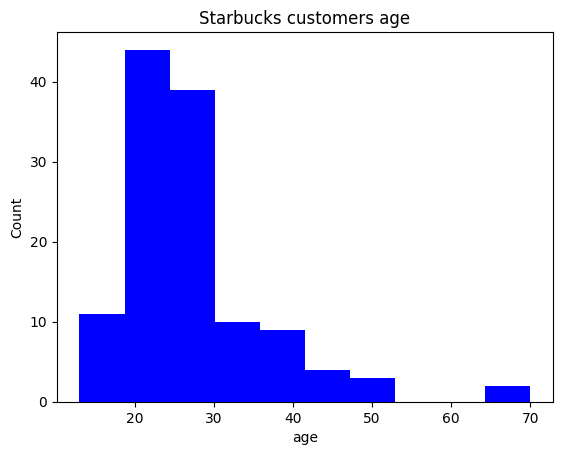

In [4]:

plt.hist(ages, bins = 10, color = 'b')
plt.title('Starbucks customers age')
plt.xlabel('age')
plt.ylabel('Count')
plt.savefig('./starbucks_customers_age.png', dpi = 100)
plt.show()

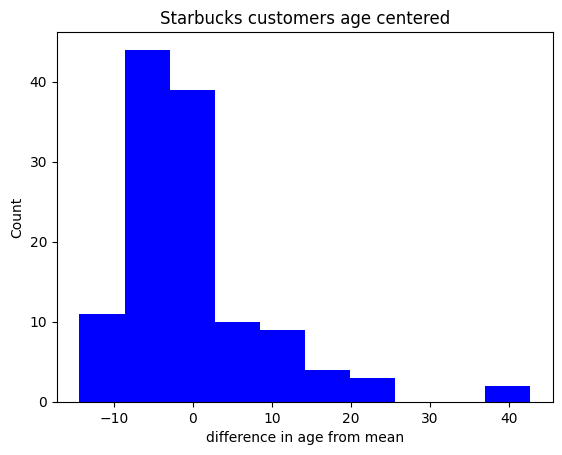

In [5]:
centered_ages = ages - mean_age
plt.hist(centered_ages, bins = 10, color = 'b')
plt.title('Starbucks customers age centered')
plt.xlabel('difference in age from mean')
plt.ylabel('Count')
plt.savefig('./starbucks_customers_age_centered.png', dpi = 100)
plt.show()


In [6]:
## set up your variables
mean_age = np.mean(ages)

## standardize ages
std_dev_age = np.std(ages)

## print the results 
ages_standardized = (ages - mean_age) / std_dev_age

print(np.mean(ages_standardized))

print(np.std(ages_standardized))

1.7290358580227847e-16
0.9999999999999999


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
ages_reshaped = np.array(ages).reshape(-1,1)
ages_scaled = scaler.fit_transform(ages_reshaped)

print(np.mean(ages_scaled))

print(np.std(ages_scaled))

1.7290358580227847e-16
0.9999999999999999


In [9]:
# get spent feature
spent = coffee["spent"]

#find the max spent
max_spent = max(spent)
#find the min spent
min_spent = min(spent)

#find the difference
spent_range = max_spent - min_spent

#normalize your spent feature
spent_normalized = (spent - min_spent)/spent_range

#print your results
print(spent_normalized)


0      0.464286
1      0.892857
2      0.357143
3      0.250000
4      0.357143
         ...   
117    0.178571
118    0.571429
119    0.071429
120    0.678571
121    0.107143
Name: spent, Length: 122, dtype: float64


In [10]:
from sklearn.preprocessing import MinMaxScaler

spent = coffee['spent']

spent_reshaped = np.array(spent).reshape(-1, 1)
mmscaler = MinMaxScaler()
reshaped_scaled = mmscaler.fit_transform(spent_reshaped)

print(np.min(reshaped_scaled), np.max(reshaped_scaled))

0.0 1.0


13 70
0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


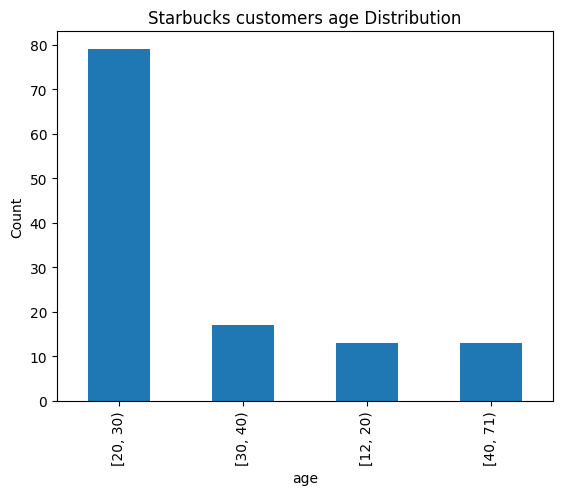

In [11]:
print(np.min(ages), np.max(ages))

age_bins = [12, 20, 30, 40, 71]

coffee["binned_ages"] = pd.cut(coffee['age'], age_bins, right = False)
print(coffee["binned_ages"].head(10))

# Plot the bar graph of binned distances
coffee['binned_ages'].value_counts().plot(kind='bar')

# Label the bar graph
plt.title('Starbucks customers age Distribution')
plt.xlabel('age')
plt.ylabel('Count')

# Show the bar graph
plt.show()




In [12]:
coffee

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout,binned_ages
0,13,8,52,4,4,4,4,4,4,4,"[40, 71)"
1,25,8,35,4,5,5,4,4,3,3,"[30, 40)"
2,10,8,29,2,1,5,2,2,2,2,"[20, 30)"
3,7,8,28,4,1,4,5,3,3,4,"[20, 30)"
4,10,8,28,4,2,4,4,3,4,3,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...,...
117,5,0,22,3,4,5,4,3,4,2,"[20, 30)"
118,16,0,22,4,3,5,4,4,5,5,"[20, 30)"
119,2,0,20,4,3,5,5,4,4,3,"[20, 30)"
120,19,0,20,4,4,4,4,4,4,4,"[20, 30)"


In [13]:
cars = pd.read_csv("./cars.csv", delimiter=";")
cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,449069,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,blue,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT)
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT)
2,288171,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,gold,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST)
3,277025,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,white,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
4,322760,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,red,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)


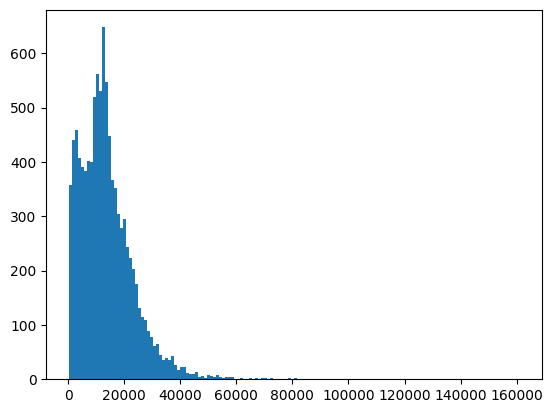

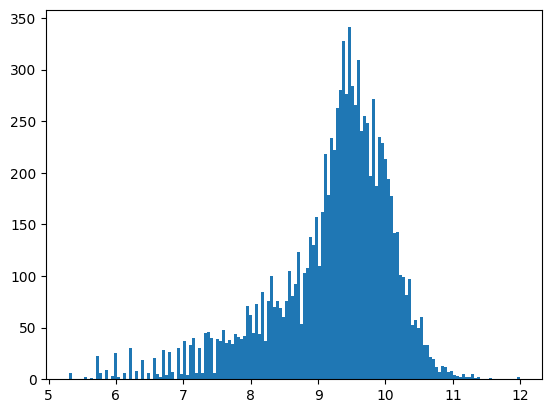

In [14]:

# set you price variable
prices = cars['sellingprice']

## plot a histogram of prices
plt.hist(prices, bins = 150)
plt.show();
## log transform prices
log_prices = np.log(prices)

## plot a histogram of log_prices
plt.hist(log_prices, bins = 150)
plt.show()

In [15]:
cars["make"].nunique()

62

In [16]:
cars["make"].unique()

array(['Chrysler', 'Volkswagen', 'Dodge', 'Mercedes-Benz', 'Ford',
       'Toyota', 'Honda', 'Nissan', 'Chevrolet', 'Jeep', 'Hyundai', 'GMC',
       'Jaguar', 'Audi', 'Lexus', 'Pontiac', 'BMW', nan, 'Suzuki',
       'Mitsubishi', 'Kia', 'MINI', 'Ram', 'Acura', 'Subaru', 'Buick',
       'Mazda', 'Volvo', 'Infiniti', 'mazda', 'cadillac', 'Isuzu', 'bmw',
       'Mercury', 'Land Rover', 'Lincoln', 'smart', 'nissan', 'HUMMER',
       'Cadillac', 'Saturn', 'Scion', 'Saab', 'FIAT', 'Porsche',
       'Rolls-Royce', 'Oldsmobile', 'chevrolet', 'lexus', 'mercedes',
       'ford', 'chrysler', 'Daewoo', 'Maserati', 'hyundai', 'dodge',
       'toyota', 'land rover', 'jeep', 'mitsubishi', 'subaru',
       'oldsmobile', 'honda'], dtype=object)

In [20]:
volkswagen_cars = cars[cars["make"] == "Volkswagen"]

volkswagen_cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT)
64,451301,2013,Volkswagen,Passat,SE PZEV,sedan,automatic,1vwbp7a30dc098938,fl,3.5,56131.0,white,black,the hertz corporation,10950,11300,Tue May 26 2015 02:15:00 GMT-0700 (PDT)
123,76803,2009,Volkswagen,Passat,Komfort,Sedan,automatic,wvwjk73c89p028582,fl,2.8,104654.0,blue,black,holman honda of fort lauderdale,6075,6500,Fri Jan 02 2015 09:35:00 GMT-0800 (PST)
165,244557,2008,Volkswagen,New Beetle,SE PZEV,Convertible,automatic,3vwrg31y78m403214,ca,4.4,48426.0,beige,tan,bob baker jeep,7625,9250,Wed Feb 04 2015 04:15:00 GMT-0800 (PST)
204,54031,2012,Volkswagen,Passat,TDI SEL Premium,Sedan,automatic,1vwcn7a31cc002307,ma,3.4,95629.0,black,tan,clay subaru,14050,11000,Tue Dec 23 2014 10:00:00 GMT-0800 (PST)


In [21]:
volkswagen_cars["model"].unique()

array(['Jetta', 'Passat', 'New Beetle', 'Golf', 'Jetta SportWagen', 'Eos',
       'Tiguan', 'Beetle', 'CC', 'Touareg', 'Jetta GLI', 'R32', 'GTI',
       'Golf R', 'Cabrio', 'Jetta Hybrid', 'Routan'], dtype=object)